# 教學目標 

主要說明matplotlib 的基礎操作

1. 使用常見的子圖與軸圖來做畫面配置

2. 等高線圖

# 範例重點

如何使用亂數, 資料集來操作


In [ ]:

#載入 numpy, 提供亂數資料與數學式, 
import numpy as np
# 載入 matplotlib
import matplotlib.pyplot as plt

x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# 設定雙格畫板大小
plt.subplot(2, 1, 1)
plt.plot(x, y_sin)
plt.title("Sine")

# 設定雙格畫板大小
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title("Cosine")

plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,3*np.pi,0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

plt.subplot(2,1,1)
plt.plot(x,y_sin)
plt.title("Sine")

plt.subplot(2,1,2)
plt.plot(x,y_cos)
plt.title("Cosin")

plt.show()


In [ ]:
# 從 `sklearn` 載入 `datasets`
from sklearn import datasets
# 載入 matplotlib
import matplotlib.pyplot as plt

# 載入 `digits`
digits = datasets.load_digits()

# 設定圖形的大小（寬, 高），畫板概念
fig = plt.figure(figsize=(4, 2)) 

# 調整子圖形 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# 把前 8 個手寫數字顯示在子圖形
for i in range(8):
    # 在 2 x 4 網格中第 i + 1 個位置繪製子圖形，並且關掉座標軸刻度
    ax = fig.add_subplot(2, 4, i + 1, xticks = [], yticks = [])
    # 顯示圖形，色彩選擇灰階
    ax.imshow(digits.images[i], cmap = plt.cm.binary)
    # 在左下角標示目標值
    ax.text(0, 7, str(digits.target[i]))

# 顯示圖形
plt.show()



In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()
fig = plt.figure(figsize=(4,2))

fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2,4,i+1, xticks =[], yticks =[])
    ax.imshow(digits.images[i],cmap = plt.cm.binary)
    ax.text(0,7,str(digits.target[i]))

plt.show()

# 軸與子圖非常相似

但是可以將圖放置在圖中的任何位置。因此，如果要在較大的圖中放置較小的圖，則可以使用軸。

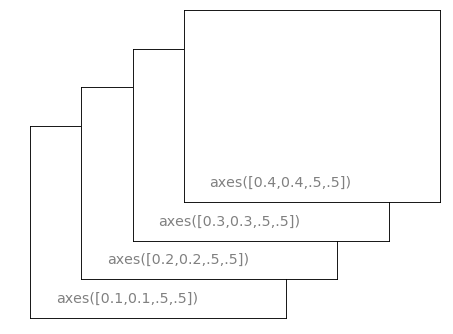 

In [ ]:
#import matplotlib.pyplot as plt

#決定最外框
plt.axes([0.1,0.1,.8,.8])
plt.xticks([]), plt.yticks([])
plt.text(0.6,0.6, 'axes([0.1,0.1,.8,.8])',ha='center',va='center',size=20,alpha=.5)

#決定內框
plt.axes([0.2,0.2,.3,.3])
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'axes([0.2,0.2,.3,.3])',ha='center',va='center',size=16,alpha=.5)

plt.show()

In [ ]:
#等高線圖
#定義函數與回傳的值
def f(x,y): return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

n = 256
x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
X,Y = np.meshgrid(x,y)

plt.contourf(X, Y, f(X,Y), 8, alpha=.75, cmap='jet')
C = plt.contour(X, Y, f(X,Y), 8, colors='black', linewidth=.5)
plt.show()

# Axes3D

3D圖形在資料分析、資料建模、圖形和影像處理等領域中都有著廣泛的應用

主要把想要觀察的重點與場景實現兩種交互

     一種是可以操縱場景從而能夠從不同的角度觀察模型
    
     一種是擁有添加與操作修改模型物件的能力


In [ ]:
#導入必要的模組
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 創建一個3d坐標系
fig = plt.figure()
ax = Axes3D(fig)

#help(plt.plot)
#help(np.random.sample)

# 利用x軸和y軸繪製sin曲線
x = np.linspace(0, 1, 100) # linspace創建等差陣列
# x = np.linespce(0,1,100)
y = np.cos(x * 2 * np.pi) / 2 + 0.5
# y = np.cos(x*2*np.pi)/2 + 0.5
# 通過zdir = 'z' 將資料繪製在z軸，zs = 0.5 則是將資料繪製在z = 0.5的地方
ax.plot(x, y, zs = 0.5, zdir = 'z', color = 'black', label = 'curve in (x, y)')
# ax.plot(x,y,zs=0.5,zdir='z',color = black,lable = 'curve in (x,y))
# 繪製散點數據 （每個顏色20個2D點）在x軸和z軸
colors = ('r', 'g', 'b', 'k')
np.random.seed(19680801) # 設置隨機函數複現
# colors = ('r','g','b','k')
# np.random.seed(19)

x = np.random.sample(20 * len(colors))
y = np.random.sample(20 * len(colors))
z = np.random.sample(20 * len(colors))

c_list = []
for i in colors:
    c_list.extend([i] * 20)
    
# 繪製散點座標 通過zdir = 'y' 將資料繪製在y為 0 的地方
ax.scatter(x, y, z, zdir = 'y', c = c_list, label = 'point in (x, z)')

# 設置圖例
ax.legend()
#限制個軸的範圍
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
# 軸添加標籤
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

